In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

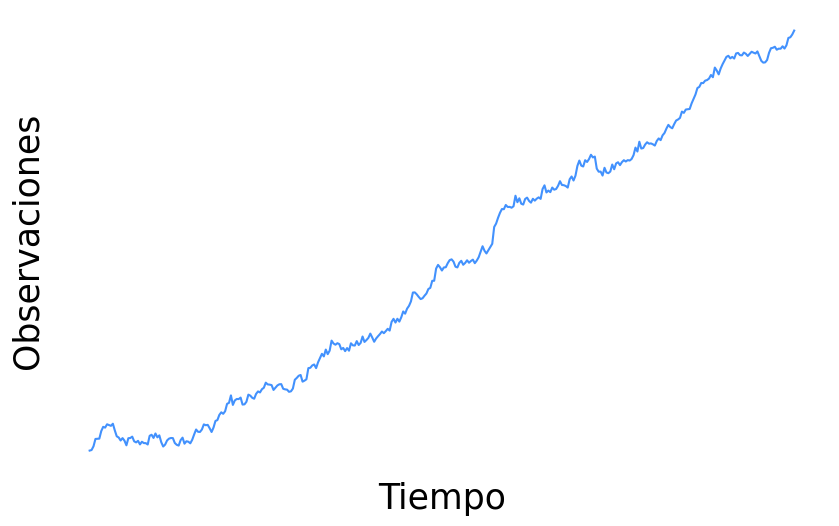

In [2]:
np.random.seed(42)

fecha_inicio = pd.to_datetime("2022-01-01")
fecha_final = pd.to_datetime("2022-12-31")
rango_fechas = pd.date_range(start=fecha_inicio, end=fecha_final, freq='D')

datos = np.cumsum(np.random.randn(len(rango_fechas))) + 100 + np.linspace(0, 100, len(rango_fechas))

df = pd.DataFrame({'Fecha': rango_fechas, 'Datos': datos})

plt.figure(figsize=(10, 6))
plt.plot(df['Fecha'], df['Datos'], color =(66/255, 145/255, 253/255))

plt.xticks([])
plt.yticks([])

plt.xlabel('Tiempo', fontsize=25)
plt.ylabel('Observaciones', fontsize=25)
plt.box(False)

#plt.savefig('../Documento/imgs_memoria/tendencia')
plt.show()

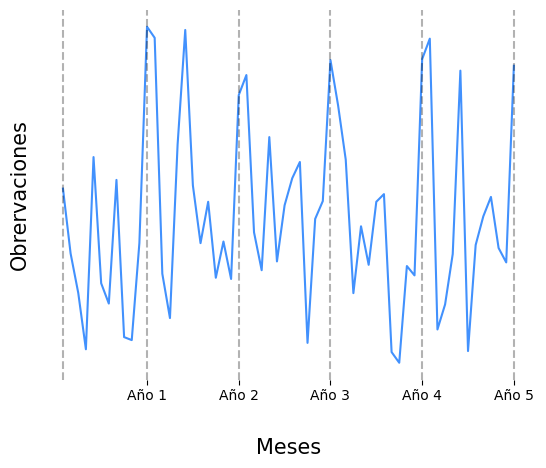

In [3]:
import matplotlib.ticker as ticker

np.random.seed(50)

years = 5
months_per_year = 12
sales_mean = 1000
sales_std = 200
increase_factor = 1.5  # Increase in sales during December and January

sales_data = []
for year in range(years):
    for month in range(months_per_year):
        if month in [11, 0]:  # December and January
            sales = np.random.normal(sales_mean * increase_factor, sales_std)
        else:
            sales = np.random.normal(sales_mean, sales_std)
        sales_data.append(sales)

# Plot sales data
plt.plot(sales_data, color =(66/255, 145/255, 253/255))
plt.xlabel("Meses", fontsize = 15, labelpad = 25)
plt.ylabel("Obrervaciones", fontsize = 15)
plt.yticks([])

# Set x-axis tick labels to indicate the beginning of each year
plt.xticks(np.arange(11, years * months_per_year+11, months_per_year), 
           [f"Año {i+1}" for i in range(years)])

# Add vertical dashed lines on top of each xtick label
for year_start in np.arange(0, years * months_per_year+11, months_per_year):
    if year_start > 0:
        year_start -= 1
    plt.axvline(x=year_start, color='black', linestyle='--', alpha=0.3)

plt.box(False)
#plt.savefig('../Documento/imgs_memoria/seasonality',  bbox_inches='tight') #bbox_inches is necessary because otherwise, the xlabel
                                                  # is not captured when saving the image
plt.show()

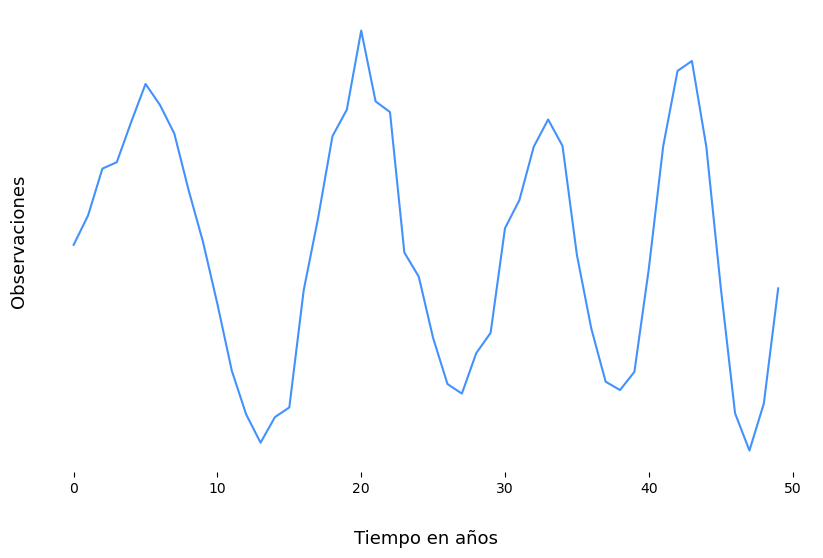

In [4]:
num_points = 50
mean_value = 0
noise_level = 2  # Nivel de ruido

def irregular_amplitude(t):
    return np.abs(15 * np.sin(0.1 * t)) + 10  # Función de amplitud

def variable_cycle_period(t):
    return 20 * np.exp(-0.01 * t)  # Período que disminuye exponencialmente con el tiempo

# Generar datos de la serie de tiempo con amplitudes irregulares y período variable
t = np.arange(num_points)
cycle_component = np.sin(2 * np.pi * t / variable_cycle_period(t))
irregular_cycle_component = irregular_amplitude(t) * cycle_component
noise = np.random.normal(0, noise_level, size=num_points)  # Generar ruido
time_series = irregular_cycle_component + mean_value + noise  # Sumar ruido

plt.figure(figsize=(10, 6))
plt.plot(t, time_series, color =(66/255, 145/255, 253/255))
plt.xlabel('Tiempo en años', fontsize = 13, labelpad = 25)
plt.ylabel('Observaciones', fontsize = 13)


plt.yticks([])

plt.box(False)
#plt.savefig('../Documento/imgs_memoria/ciclo',  bbox_inches='tight')#bbox_inches is necessary because otherwise, the xlabel
                                                  # is not captured when saving the image

plt.show()

[]

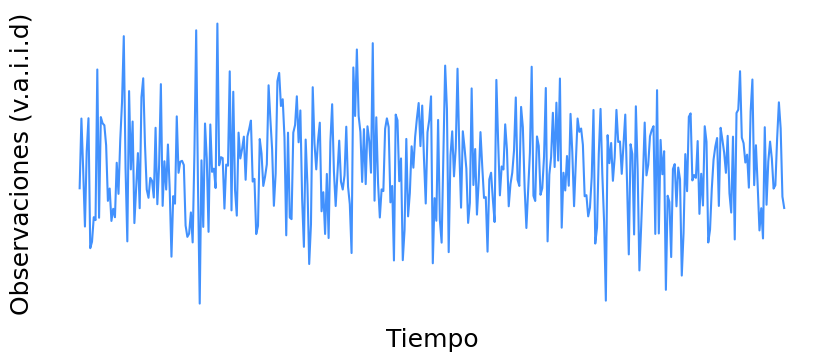

In [5]:
#Ahora vamos a plotear una serie temporal que solo tenga ruido. Y vamos a ver su tendencia y estacionalidad
serie_temporal_ruido = []
#nos creamos 400 valores aleatorios provenientes de una distribución normal guassiana con media 0 y desviación típica 1
errors = np.random.normal(0, 1, 400)
serie_temporal_ruido = errors.tolist()
    
#vamos a ver la serie temporal resultante
plt.figure(figsize=(10,4))
plt.plot(serie_temporal_ruido, color =(66/255, 145/255, 253/255))
plt.xlabel('Tiempo', fontsize = 18)
plt.ylabel('Observaciones (v.a.i.i.d)', fontsize = 18)

plt.xticks([])
plt.yticks([])

plt.box(False)
#plt.savefig('../Documento/imgs_memoria/ruido')
plt.plot()

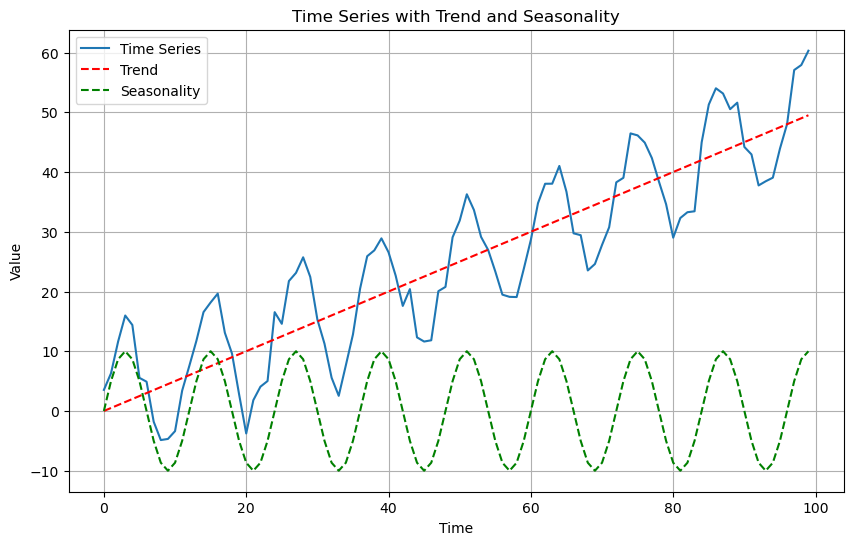

In [6]:
#TIME SERIES COMPONENTS
np.random.seed(0)
n = 100
t = np.arange(n)
trend = 0.5 * t  # Linear trend
seasonality = 10 * np.sin(2 * np.pi * t / 12)  
noise = np.random.normal(0, 2, n)  # Gaussian noise

time_series = trend + seasonality + noise

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(t, time_series, label='Time Series')
plt.plot(t, trend, linestyle='--', color='r', label='Trend')
plt.plot(t, seasonality, linestyle='--', color='g', label='Seasonality')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series with Trend and Seasonality')
plt.legend()
plt.grid(True)
plt.show()

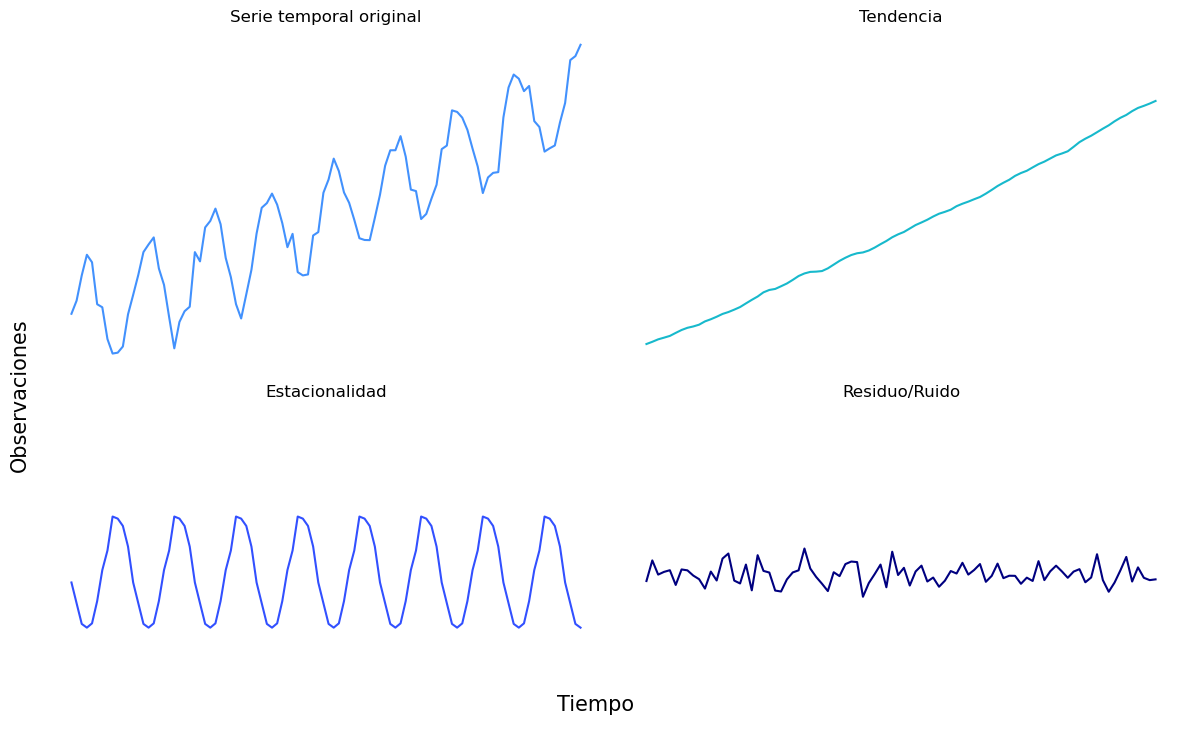

In [7]:
np.random.seed(0)
n = 100
t = np.arange(n)
trend = 0.5 * t  
seasonality = 10 * np.sin(2 * np.pi * t / 12)  
noise = np.random.normal(0, 2, n)  

time_series = trend + seasonality + noise

decomposition = sm.tsa.seasonal_decompose(time_series, model='additive', period=12)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axs[0, 0].plot(time_series, color =(66/255, 145/255, 253/255))
axs[0, 0].set_title('Serie temporal original')

axs[0, 1].plot(decomposition.trend, color =(23/255, 185/255, 204/255))
axs[0, 1].set_ylim(0, 60)
axs[0, 1].set_title('Tendencia')

axs[1, 0].plot(decomposition.seasonal, color =(50/255, 80/255, 255/255))
axs[1, 0].set_ylim(30, -30)
axs[1, 0].set_title('Estacionalidad')

axs[1, 1].plot(decomposition.resid, color = 'navy')
axs[1, 1].set_ylim(30, -30)
axs[1, 1].set_title('Residuo/Ruido')

for i in range(0,2):
    for j in range(0,2):
        axs[i, j].spines['top'].set_visible(False)
        axs[i, j].spines['right'].set_visible(False)
        axs[i, j].spines['bottom'].set_visible(False)
        axs[i, j].spines['left'].set_visible(False)
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])
        
fig.supxlabel('Tiempo',  ha='center', fontsize = 15, y = 0.1)
fig.supylabel('Observaciones',  ha='center', fontsize = 15)

#plt.savefig('../Documento/imgs_memoria/figComp')
plt.tight_layout()
plt.show()

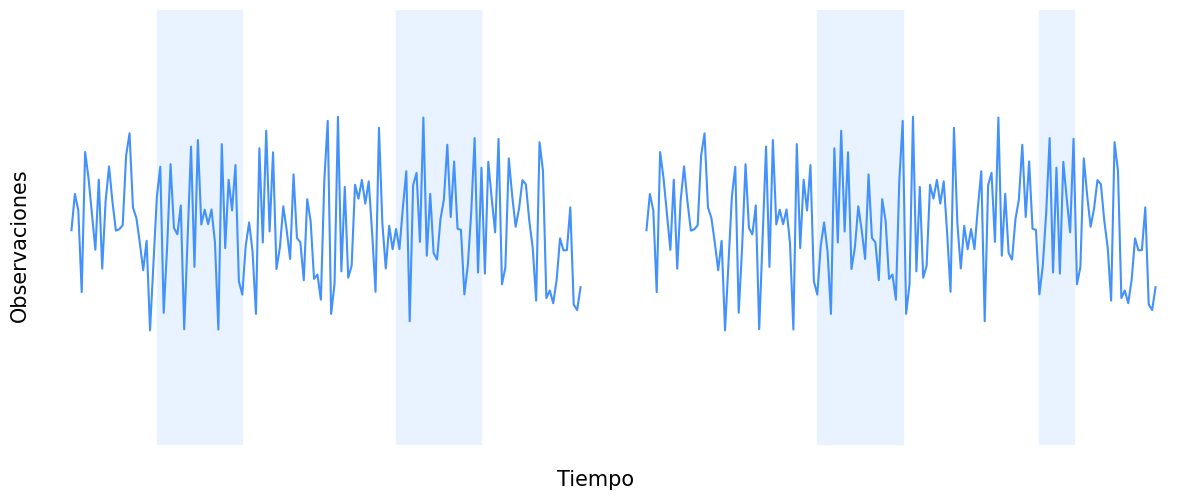

In [8]:
np.random.seed(37)

# Parameters
num_samples = 150
mean = 0
std_dev = 0.4

time_series1 = np.random.normal(mean, std_dev, num_samples)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(time_series1, color =(66/255, 145/255, 253/255))
ax[0].axvspan(25, 50, color =(232/255, 243/255, 255/255))
ax[0].axvspan(95, 120, color =(232/255, 243/255, 255/255))


ax[1].plot(time_series1, color =(66/255, 145/255, 253/255))
ax[1].axvspan(50, 75, color =(232/255, 243/255, 255/255))
ax[1].axvspan(115, 125, color =(232/255, 243/255, 255/255))
for i in range(0,2):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_ylim(-1.75, 1.75)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].spines['left'].set_visible(False)



fig.supxlabel('Tiempo',  ha='center', fontsize = 15)
fig.supylabel('Observaciones',  ha='center', fontsize = 15)
#plt.savefig('../Documento/imgs_memoria/estac')
plt.tight_layout()
plt.show()

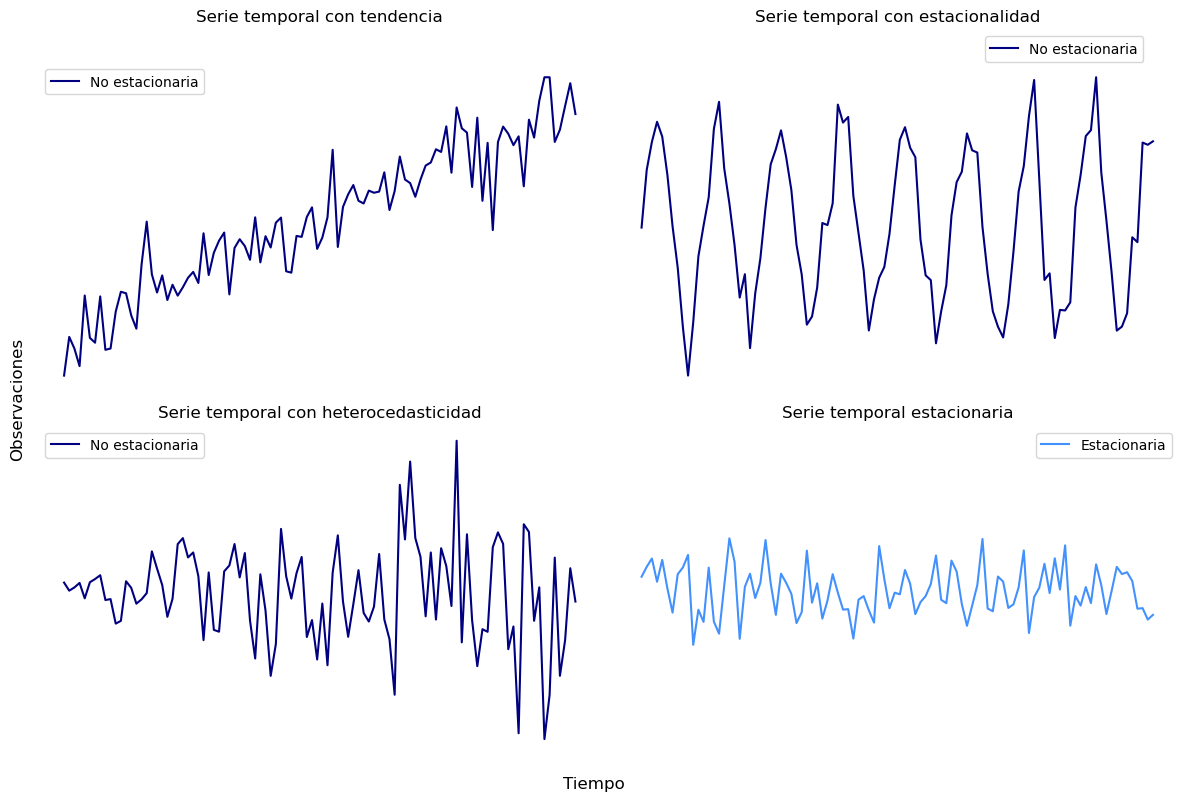

In [16]:
np.random.seed(50)


n_points = 100


trend_series = np.linspace(0, 10, n_points) + np.random.normal(0, 1, n_points)


time = np.arange(n_points)
seasonal_series = 5 * np.sin(2 * np.pi * time / 12) + np.random.normal(0, 1, n_points)

# Serie temporal con heterocedasticidad (varianza no constante)
heteroscedastic_series = np.random.normal(0, np.linspace(1, 5, n_points), n_points)
heteroscedastic_series = heteroscedastic_series +12 # para que sea positiva y no 
                                                    # de problemas al sacar el logaritmo

stationary_series = np.random.normal(0, 1, n_points) + 5


fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].plot(trend_series, label='No estacionaria', color = 'navy')
axs[0, 0].set_title('Serie temporal con tendencia', y =1.1)
axs[0, 0].legend()


axs[0, 1].plot(seasonal_series, label='No estacionaria', color = 'navy')
axs[0, 1].set_title('Serie temporal con estacionalidad', y =1.1)
axs[0, 1].legend(loc='upper right', bbox_to_anchor =(0.95, 1.1))

axs[1, 0].plot(heteroscedastic_series, label='No estacionaria', color = 'navy')
axs[1, 0].set_title('Serie temporal con heterocedasticidad')
axs[1, 0].legend()

axs[1, 1].plot(stationary_series, label='Estacionaria', color =(66/255, 145/255, 253/255))
axs[1, 1].set_title('Serie temporal estacionaria')
axs[1, 1].set_ylim(-1, 11)
axs[1, 1].legend()

for i in range(0,2):
    for j in range(0,2):
        axs[i, j].spines['top'].set_visible(False)
        axs[i, j].spines['right'].set_visible(False)
        axs[i, j].spines['bottom'].set_visible(False)
        axs[i, j].spines['left'].set_visible(False)
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])

        
fig.supxlabel('Tiempo',  ha='center')
fig.supylabel('Observaciones',  ha='center')

#plt.savefig('../Documento/imgs_memoria/code_estac')
plt.tight_layout()
plt.show()

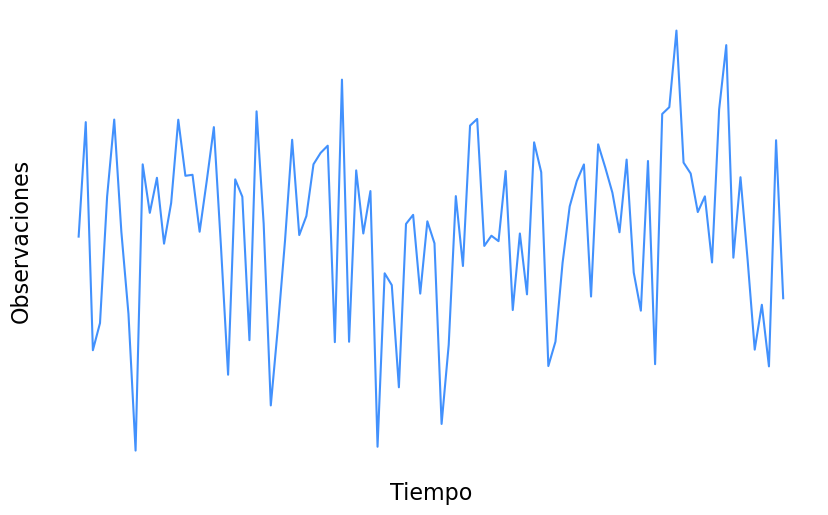

In [17]:
num_points = 100
mean_value = 10
initial_variance = 1
change_rate = 0.002

t = np.arange(num_points)
time_series = np.zeros(num_points)
time_series[0] = np.random.normal(mean_value, initial_variance)
for i in range(1, num_points):
    time_series[i] = np.random.normal(mean_value, initial_variance + i * change_rate)

plt.figure(figsize=(10, 6))
plt.plot(t, time_series, color =(66/255, 145/255, 253/255))
plt.xlabel('Tiempo', fontsize = 16)
plt.ylabel('Observaciones', fontsize = 16)

plt.xticks([])
plt.yticks([])

plt.box(False)
#plt.savefig('../Documento/imgs_memoria/dudosa_estac')
plt.show()

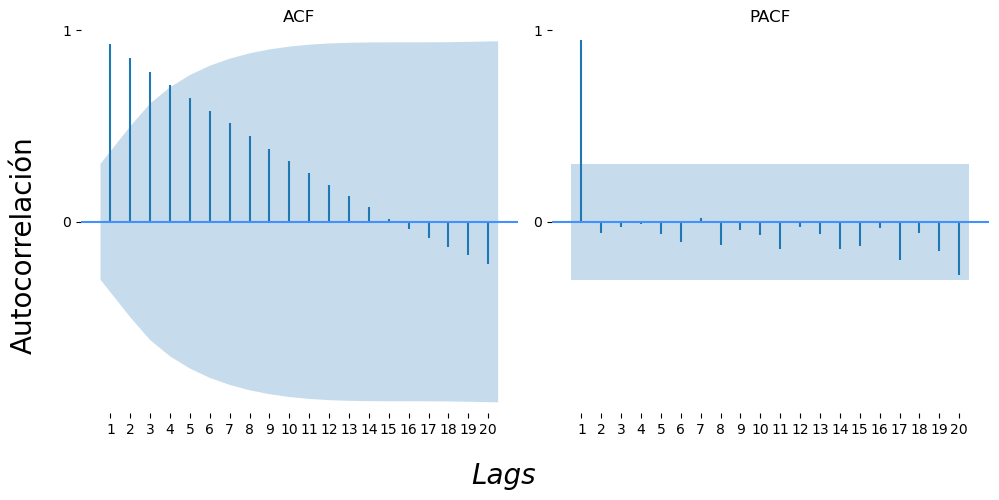

In [18]:
#EJEMPLO GRAFICAS ACF CON SU PACF

np.random.seed(30)
np.random.seed(42)
n = 42
t = np.arange(n)
trend = 0.1 * t  # Tendencia ascendente
noise = np.random.normal(0, 0.05, size=n)  # Ruido aleatorio
time_series = trend + noise

x = np.arange(1,21)
y = [0,1]

fig, ax = plt.subplots(1,2, figsize=(10, 5), tight_layout = True)
plot_acf(time_series, ax=ax[0], lags = 20, title = 'ACF', marker = None, zero = False, color =(66/255, 145/255, 253/255))
plot_pacf(time_series, ax=ax[1], lags = 20, title = 'PACF', marker = None, zero = False, color =(66/255, 145/255, 253/255))

for i  in range(0,2):
    ax[i].set_xticks(x)
    ax[i].set_yticks(y)
    ax[i].set_ylim(-1,1)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    
fig.supxlabel('Lags', ha='center', fontdict={'fontstyle': 'italic'}, fontsize =20)
fig.supylabel('Autocorrelación',  ha='center', fontsize = 20)
#plt.savefig('../Documento/imgs_memoria/acfpacf')
plt.show()

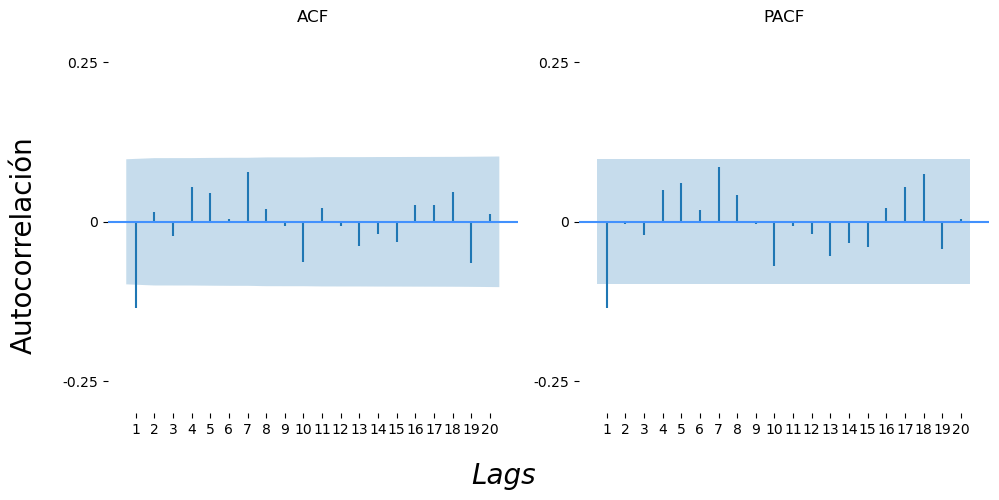

In [19]:
from matplotlib.ticker import FuncFormatter #this is to plot the 0 ytick as an interger and not as 0.00
np.random.seed(30)
errors = np.random.normal(0, 1, 400)

fig, ax = plt.subplots(1, 2, figsize=(10, 5), tight_layout=True)

# Plot ACF
plot_acf(errors, ax=ax[0], lags=20, title='ACF', marker=None, zero=False, color =(66/255, 145/255, 253/255))
# Plot PACF
plot_pacf(errors, ax=ax[1], lags=20, title='PACF', marker=None, zero=False, color =(66/255, 145/255, 253/255))

def y_formatter(x, pos):
    if np.isclose(x, 0):
        return '0'
    else:
        return '{:.2f}'.format(x)

# Apply custom formatter to y-axis
for i in range(2):
    ax[i].yaxis.set_major_formatter(FuncFormatter(y_formatter))

x = np.arange(1, 21)
y_ticks = [-0.25, 0, 0.25]
for i in range(2):
    ax[i].set_xticks(x)
    ax[i].set_yticks(y_ticks)
    ax[i].set_ylim(-0.3, 0.3)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].spines['left'].set_visible(False)

fig.supxlabel('Lags', ha='center', fontdict={'fontstyle': 'italic'}, fontsize =20)
fig.supylabel('Autocorrelación',  ha='center', fontsize =20)
#plt.savefig('../Documento/imgs_memoria/acfpacfestat')
plt.show()

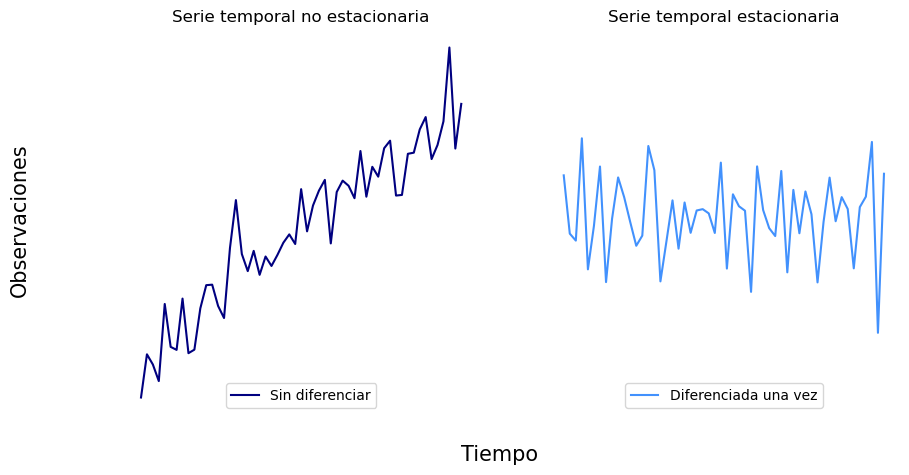

Pvalor con la diferencia: 2.4953108420149574e-07



In [27]:
from statsmodels.tsa.stattools import adfuller

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(trend_series, label='Sin diferenciar', color ='navy')
axs[0].set_title('Serie temporal no estacionaria')
axs[0].legend(loc= 'lower center')

axs[1].plot(np.diff(trend_series), label='Diferenciada una vez', color =(66/255, 145/255, 253/255))
axs[1].set_title('Serie temporal estacionaria')
axs[1].set_ylim(-7, 7)
axs[1].legend(loc='lower center')

for i in range(0,2):
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['bottom'].set_visible(False)
    axs[i].spines['left'].set_visible(False)
    axs[i].set_xticks([])
    axs[i].set_yticks([])

fig.supxlabel('Tiempo', ha='center', fontsize = 15)
fig.supylabel('Observaciones',  ha='center', fontsize = 15)
#plt.savefig('../Documento/imgs_memoria/diff')
plt.show()

########################################################################################

def adf_test(data, string):
    
    adf_result = adfuller(data)#dropna() es buena práctica ponerlo para el ADF
    print(string+': '+ str(adf_result[1])+'\n')
    
adf_test(np.diff(trend_series), "Pvalor con la diferencia")

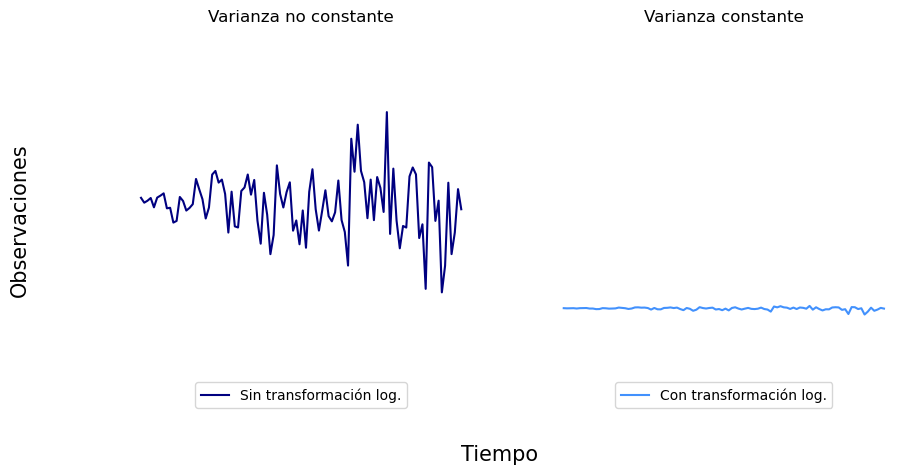

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(heteroscedastic_series, label='Sin transformación log.', color ='navy')
axs[0].set_title('Varianza no constante')
axs[0].legend()
axs[0].set_ylim(-10, 30)
axs[0].legend(loc='lower center')


axs[1].plot(np.log10(heteroscedastic_series), label='Con transformación log.', color =(66/255, 145/255, 253/255))
axs[1].set_title('Varianza constante')
axs[1].legend()
axs[1].legend(loc='lower center')

axs[1].set_ylim(-10, 30)
for i in range(0,2):
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['bottom'].set_visible(False)
    axs[i].spines['left'].set_visible(False)
    axs[i].set_xticks([])
    axs[i].set_yticks([])

fig.supxlabel('Tiempo', ha='center', fontsize = 15)
fig.supylabel('Observaciones',  ha='center', fontsize = 15)    
#plt.savefig('../Documento/imgs_memoria/log')
plt.show()

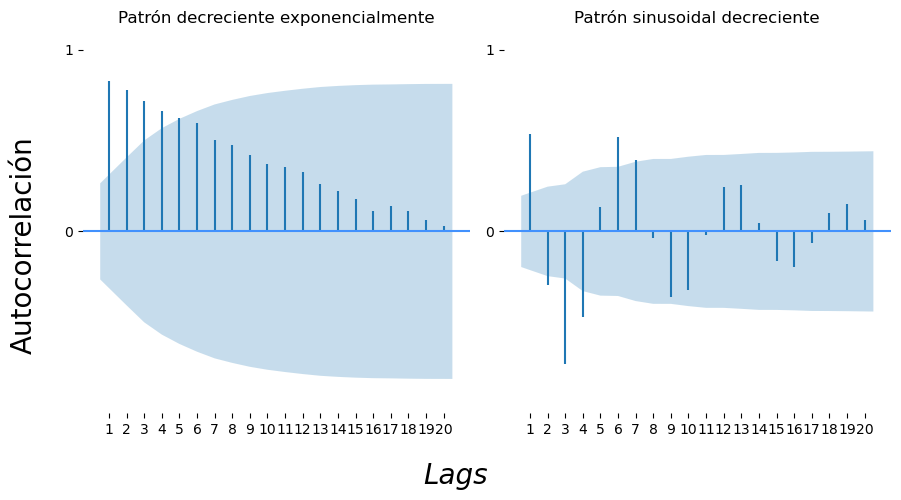

In [12]:
#EJEMPLO PATRON DECRECIENTE Y DECRECIENTE DE UN PROCESO AR

np.random.seed(50)
n_points = 55
trend_series = np.linspace(0, 10, n_points) + np.random.normal(0, 1, n_points)

np.random.seed(42)
t = np.arange(100)
data = np.sin(t) / np.exp(0.1 * t)  

x = np.arange(1, 21)
y = [0,1]

fig, ax = plt.subplots(1, 2, figsize=(9, 5), tight_layout = True)
plot_acf(trend_series, ax=ax[0], lags = 20, marker = None, zero = False, color =(66/255, 145/255, 253/255))
ax[0].set_title('Patrón decreciente exponencialmente')

plot_acf(data, ax = ax[1],lags = 20, marker = None, zero = False, color =(66/255, 145/255, 253/255))
ax[1].set_title('Patrón sinusoidal decreciente')

for i  in range(0,2):
    ax[i].set_xticks(x)
    ax[i].set_yticks(y)
    ax[i].set_ylim(-1,1.1)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    
fig.supxlabel('Lags', ha='center', fontdict={'fontstyle': 'italic'}, fontsize =20)
fig.supylabel('Autocorrelación',  ha='center', fontsize =20)
#plt.savefig('../Documento/imgs_memoria/patron_ar')
plt.show()

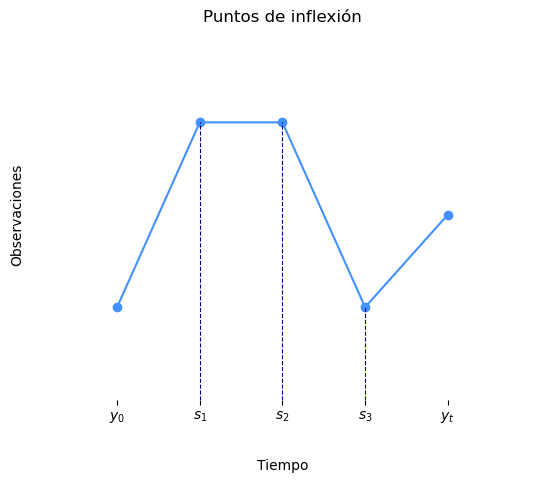

In [23]:
x = np.arange(5)
y = np.array([1, 3, 3, 1, 2])

plt.plot(x, y, marker='o', color =(66/255, 145/255, 253/255))

plt.ylim(0, 4)
plt.xlim(-1, 5)

custom_labels = ['$y_0$', '$s_1$', '$s_2$', '$s_3$', '$y_t$']
plt.xlabel('Tiempo', labelpad=25)
plt.ylabel('Observaciones')
plt.xticks(x, custom_labels)
plt.yticks([])
plt.box(False)

for i, value in enumerate(y):
    if (i != 0 and i != len(y) - 1):
        plt.axvline(x=i, ymin=0, ymax=value / 4, linestyle='--', color='navy', linewidth=0.8)


plt.title('Puntos de inflexión')

#plt.savefig('../Documento/imgs_memoria/inflexion',  bbox_inches='tight') #bbox is necessary because otherwise, the xlabel is not
                                                #captuder when saving the image.
plt.show()

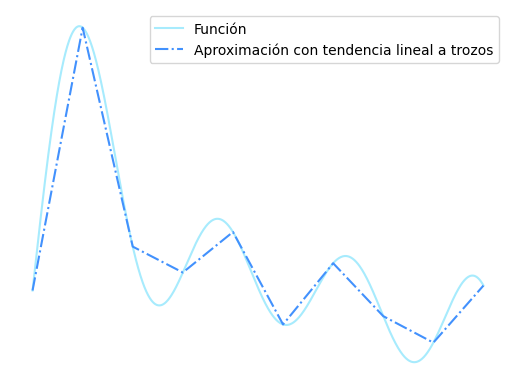

In [24]:
def smooth_function(x):
    return np.sin(x) + np.sin(2*x) + np.sin(3*x) + np.sin(4*x)

def piecewise_linear_approximation(x, segments=10):
    x_segments = np.linspace(0, 5, segments)
    y_segments = smooth_function(x_segments)
    y_values = np.interp(x, x_segments, y_segments)
    return y_values

x_values = np.linspace(0, 5, 1000)
y_values_smooth = smooth_function(x_values)
y_values_piecewise = piecewise_linear_approximation(x_values)

plt.plot(x_values, y_values_smooth, label='Función', color =(167/255, 235/255, 253/255))
plt.plot(x_values, y_values_piecewise, label='Aproximación con tendencia lineal a trozos', color =(66/255, 145/255, 253/255), ls = '-.')

plt.xticks([])
plt.yticks([])
plt.legend()
plt.box(False)

#plt.savefig('../Documento/imgs_memoria/piecewise_approx')
plt.show()

In [ ]:
from PIL import Image
def change_color(image_path, f,s,t, b,b2, b3, fb, sb, tb, replacement_color, rc1, rc2):
    image = Image.open(image_path)

    width, height = image.size
    contador = 0 
    my_set = set()
    for x in range(width):
        for y in range(height):
            current_color = image.getpixel((x, y))
            if current_color[0] in f and current_color[1] in s and current_color[2] in t:
                image.putpixel((x, y), replacement_color)
            elif current_color[0] in b and current_color[1] in b2 and current_color[2] in b3:
                image.putpixel((x, y), rc1)
            elif current_color[0] in fb and current_color[1] in sb and current_color[2] in tb:
                image.putpixel((x, y), rc2)
            else:
                my_set.add(current_color)
            
    image.save("lstm5.png")
    print(my_set)
#     print(width*height)
#     print(contador)
# Example usage
try:
    image_path = "C:/Users/jcoqu/OneDrive/Documents/U-tad/Curso5/TFG/TFG_MATH/Documento/imgs_memoria/lstm5.png"
except Exception as e:
    print(e)
first_range = list(np.arange(219, 231,1))
second_range = list(np.arange(239, 251,1))
third_range = list(np.arange(199, 255,1))
fb = list(np.arange(50, 180,1))
sb =  list(np.arange(120,199,1))
tb = list(np.arange(75, 175,1))
print(first_range)
print(second_range)
print(third_range)
b1 = list(np.arange(200, 219,1))
b2 = list(np.arange(220, 251, 1))
b3 = list(np.arange(180, 215,1))
target_color = (225,247,208,255)  # Red color
rc1 = (215, 234, 255, 255)
rc2 = (0,0,0, 255)
replacement_color = (232,243,255,255) # Green color
change_color(image_path, first_range, second_range, third_range, b1, b2, b3, fb, sb, tb,
             replacement_color, rc1, rc2)